In [ ]:
import Function as F
import DefineFiles as D
import importlib
importlib.reload(F)
importlib.reload(D)
from Function import *
from DefineFiles import *


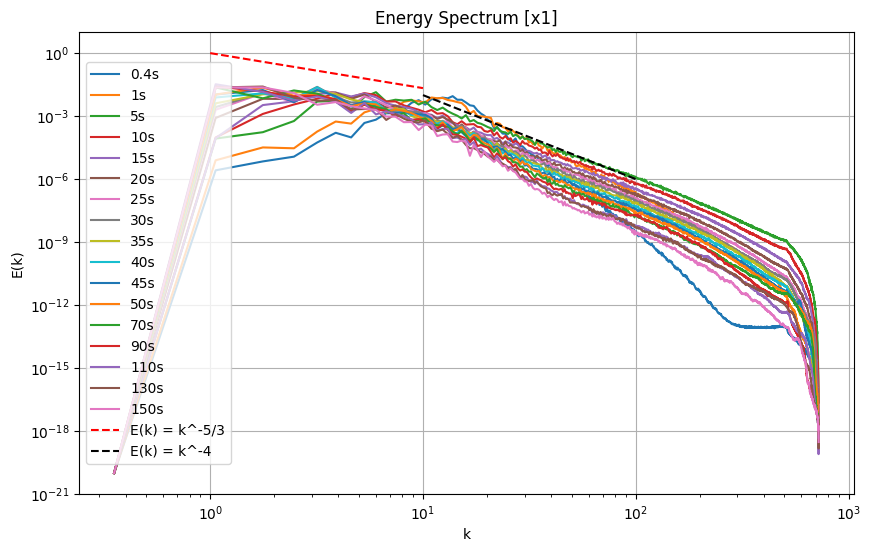

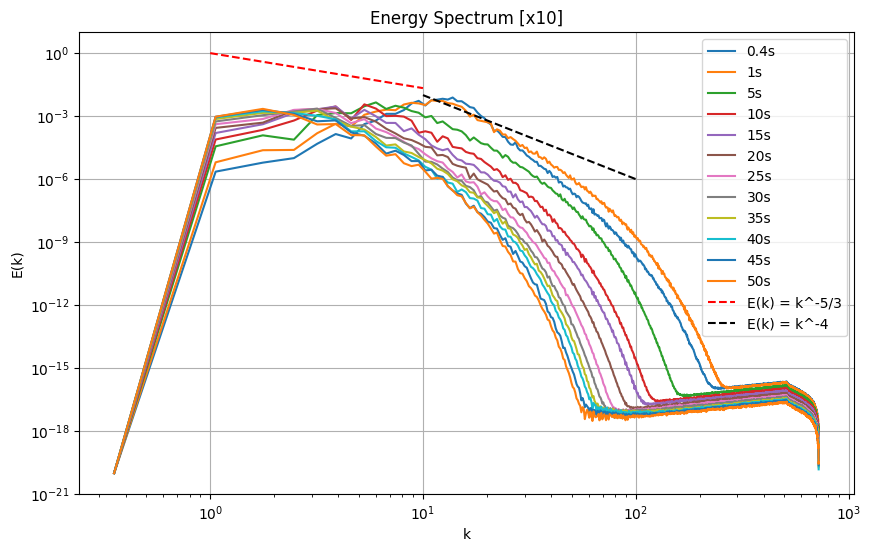

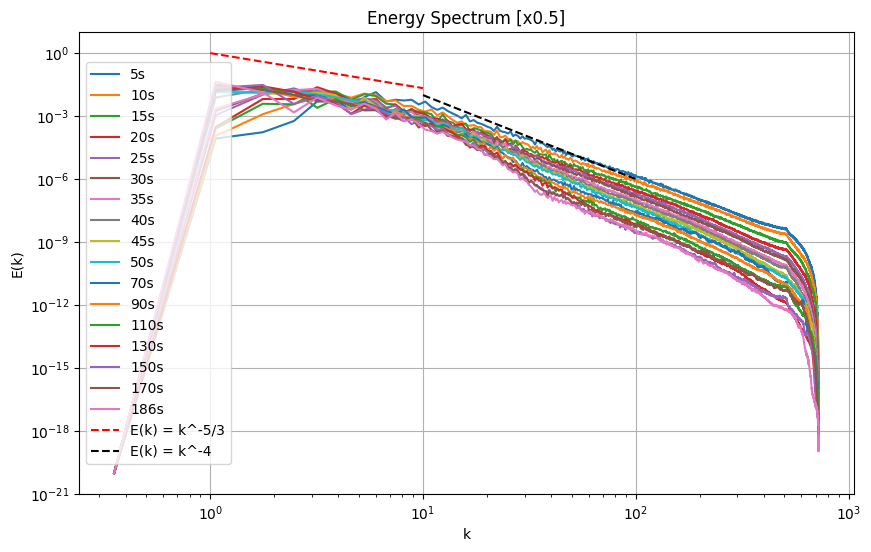

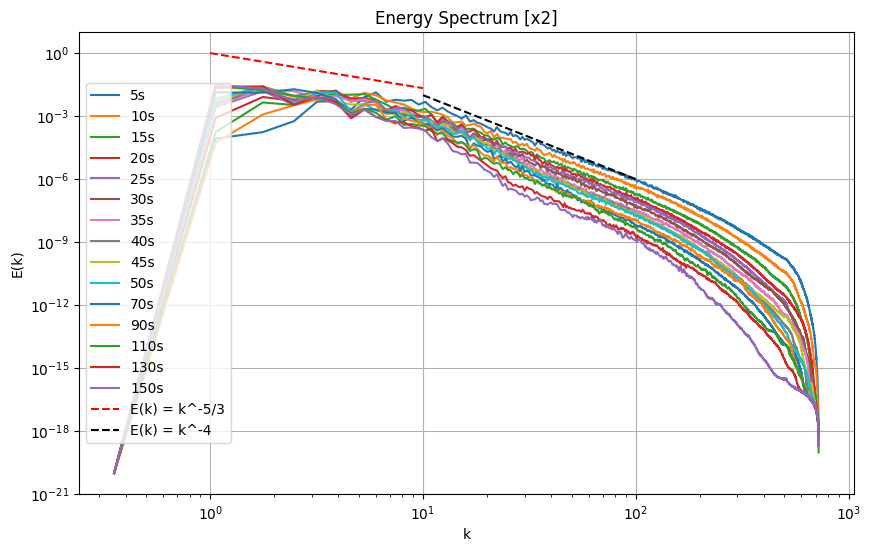

In [26]:
files_list = [files, files2, files3, files4]
titles = ["[x1]", "[x10]", "[x0.5]", "[x2]"]

for files, title in zip(files_list, titles):
    plt.figure(figsize=(10, 6))
    for file in files:
        F.velocity_plotting(file)
        k, e_k = get_ek(file)

    compared_line()
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.title(f"Energy Spectrum {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

## dissipation rate ##

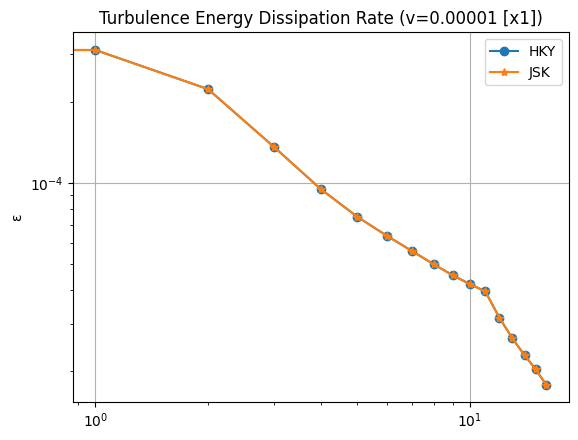

[3.14493771e-04 3.11528142e-04 2.22999331e-04 1.36134777e-04
 9.49673940e-05 7.50657258e-05 6.37732805e-05 5.60270056e-05
 4.99882611e-05 4.55064316e-05 4.21994015e-05 3.96382651e-05
 3.16241200e-05 2.65108958e-05 2.29973590e-05 2.03586009e-05
 1.78395054e-05]


In [62]:
plt.figure()
eps1 = np.array([])
time_for_eps = np.array([])
for file in files:
    ux, uy = sep(file)
    ux, uy = resizing(ux, uy)
    epsilon = energy_dissipation(ux, uy, 0.00001)
    eps1 = np.append(eps1, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps = np.append(time_for_eps, label)
plt.loglog(time_for_eps, eps1, marker='o', linestyle='-', label = 'HKY')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 [x1])")

eps12 = np.array([])
time_for_eps = np.array([])
for file in files:
    ux, uy = sep(file)
    ux, uy = resizing(ux, uy)
    epsilon = dissipation_rate_2d(ux, uy, 0.00001)
    eps12 = np.append(eps12, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps = np.append(time_for_eps, label)
plt.loglog(time_for_eps, eps12, marker='*', linestyle='-', label = 'JSK')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 [x1])")
plt.grid(True)
plt.legend()
plt.show()
print(eps12)

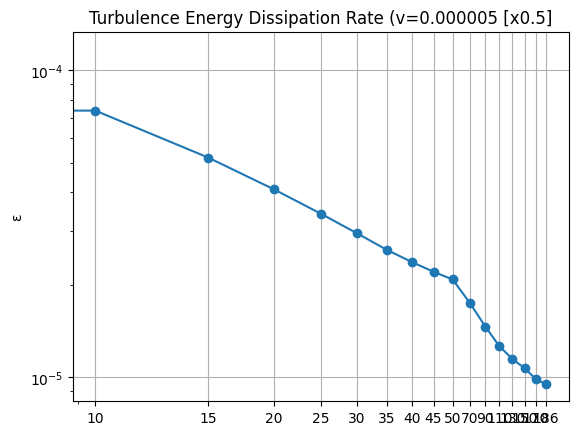

In [28]:
eps3 = np.array([])
time_for_eps3 = np.array([])
for file in files3:
    ux, uy = sep(file)
    ux, uy = resizing(ux, uy)
    epsilon = dissipation_rate_2d(ux, uy, 0.000005)
    eps3 = np.append(eps3, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps3 = np.append(time_for_eps3, label)
plt.loglog(time_for_eps3, eps3, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.000005 [x0.5]")
plt.grid(True)
plt.show()

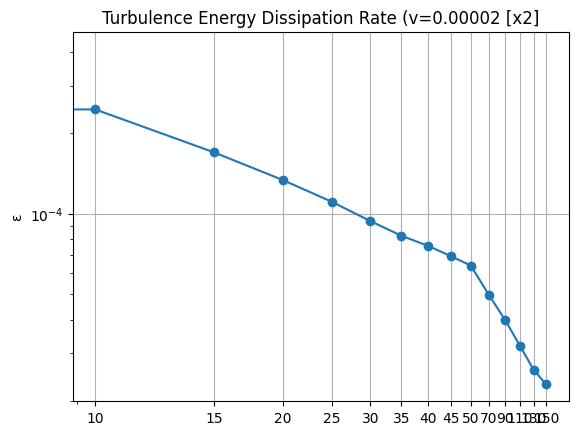

In [29]:
eps4 = np.array([])
time_for_eps4 = np.array([])
for file in files4:
    ux, uy = sep(file)
    ux, uy = resizing(ux, uy)
    epsilon = dissipation_rate_2d(ux, uy, 0.00002)
    eps4 = np.append(eps4, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps4 = np.append(time_for_eps4, label)
plt.loglog(time_for_eps4, eps4, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00002 [x2]")
plt.grid(True)
plt.show()

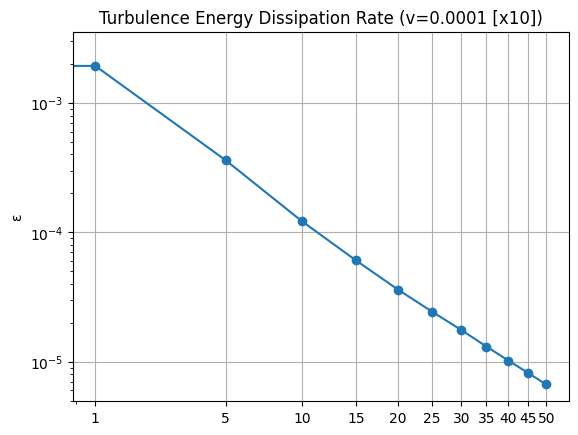

In [60]:
eps2 = np.array([])
time_for_eps2 = np.array([])
for file in files2:
    ux, uy = sep(file)
    ux, uy = resizing(ux, uy)
    epsilon = dissipation_rate_2d(ux, uy, 0.0001)
    eps2 = np.append(eps2, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps2 = np.append(time_for_eps2, label)
plt.loglog(time_for_eps2, eps2, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.0001 [x10])")
plt.grid(True)
plt.show()

## enstrophy dissipation rate ##

[0.03534797 0.32317932 0.17227698 0.08686154 0.04917965 0.03206274
 0.0185367  0.01384817 0.01069213 0.00871733 0.00586066 0.00479748
 0.00251733 0.00218627 0.001437  ]


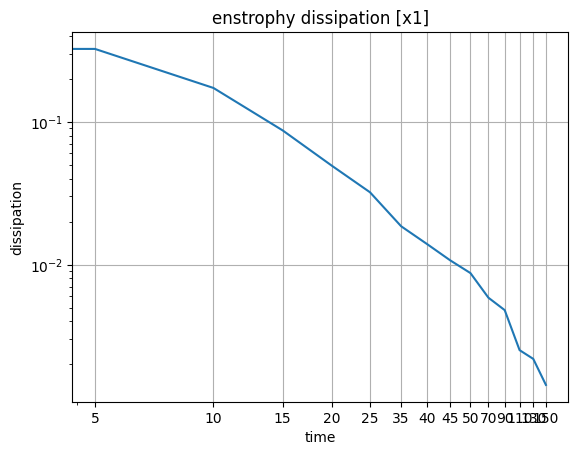

In [63]:
zeta1 = np.array([])
label1 = np.array([])

for file in files_vor:
    data, label = get_vorticity(file)
    nu = 0.00001
    zeta_value = enstrophy_diss(data, nu)
    zeta1 = np.append(zeta1, zeta_value)
    label1 = np.append(label1, label)
    
print(zeta1)
plt.loglog(label1, zeta1)
plt.title('enstrophy dissipation [x1]')
plt.ylabel('dissipation')
plt.xlabel('time')
plt.grid()
plt.show()

In [32]:
kd1 = kd_2d(zeta1, 0.00001)
kd1

array([181.15934457, 261.96338522, 235.88729149, 210.44466459,
       191.40983001, 178.23791979, 162.68170885, 154.96445132,
       148.42625012, 143.45992142, 134.27375764, 129.86802246,
       116.63353432, 113.92455512, 106.22886781])

## Three dimensional forced case ##

In [33]:
eta1 = kom_scale(eps1, 0.00001)
kd1 = kd_range(eps1, 0.00001)
kd1

array([674.38799624, 591.51129695, 539.49439718, 508.10494134,
       484.80282021, 465.25219615, 450.79805553, 441.21166616,
       431.58991478, 422.83541458, 397.16980082, 376.23436074,
       355.90557829, 337.93547045, 327.38955309])

## Enstrophy ##

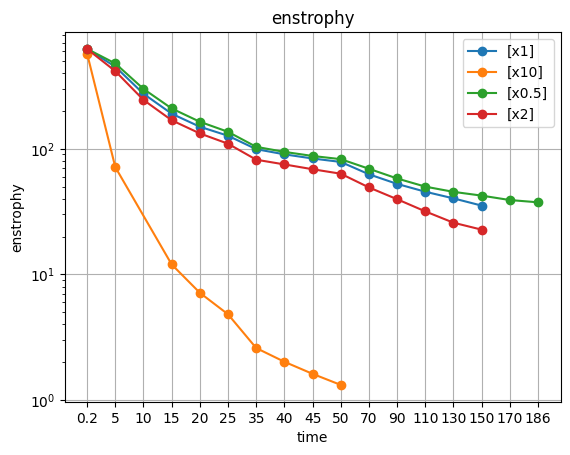

In [58]:
ens1, nu1, label1 = np.array([]), 0.00001, np.array([])
ens2, nu2, label2 = np.array([]), 0.0001, np.array([])
ens3, nu3, label3 = np.array([]), 0.000005, np.array([])
ens4, nu4, label4 = np.array([]), 0.00002, np.array([])

for file in files_vor:
    ens1_1, label1_1= enstrophy(file, nu1, visualize=False)
    label1 = np.append(label1, label1_1)
    ens1 = np.append(ens1, ens1_1)

for file in files2_vor:
    ens2_2, label2_1 = enstrophy(file, nu2, visualize=False)
    label2 = np.append(label2, label2_1)
    ens2 = np.append(ens2, ens2_2)

for file in files3_vor:
    ens3_2, label3_1 = enstrophy(file, nu3, visualize=False)
    label3 = np.append(label3, label3_1)
    ens3 = np.append(ens3, ens3_2)

for file in files4_vor:
    ens4_2, label4_1 = enstrophy(file, nu4, visualize=False)
    label4 = np.append(label4, label4_1)
    ens4 = np.append(ens4, ens4_2)

plt.figure()
plt.plot(label1, ens1, marker='o', linestyle='-', label = '[x1]')
plt.plot(label2, ens2, marker='o', linestyle='-', label = '[x10]')
plt.plot(label3, ens3, marker='o', linestyle='-', label = '[x0.5]')
plt.plot(label4, ens4, marker='o', linestyle='-', label = '[x2]')
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('enstrophy')
plt.title('enstrophy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
eps1 = ens1**(3/2)
nu1 = 0.0001
Ld1 = (nu1**3/eps1)**(1/6)
kd1 = Ld1**(-1)
kl1 = kd1 - Ld1
print(kd1)

eps2 = ens2**(3/2)
nu2 = 0.0001
Ld2 = (nu2**3/eps2)**(1/6)
kd2 = Ld2**(-1)
kl2 = kd2 - Ld2
print(kd2)

## Enstrophy dissipation (new) ##

In [ ]:
def compute_dissipation_rates(omega, nu, L):
    """
    점성 엔스트로피 소산율 (η_ν)과 점성 와도 소산율 (ε_ν) 계산

    Parameters:
    omega : 2D numpy array
        와도 데이터 (NxN 그리드에서 측정된 값)
    nu : float
        점성 계수 (kinematic viscosity)
    L : float
        도메인 크기 (와도가 정의된 영역의 물리적 크기)

    Returns:
    eta_nu : float
        점성 엔스트로피 소산율 (η_ν)
    epsilon_nu : float
        점성 와도 소산율 (ε_ν)
    """

    # 그리드 크기
    N = 1024
    omega = omega.reshape(N,N)
    
    # k-space 생성 (푸리에 변환에서 사용할 파수 벡터)
    kx = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
    ky = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
    kx, ky = np.meshgrid(kx, ky)
    k_squared = kx**2 + ky**2  # |k|^2 계산

    # 2D 푸리에 변환
    omega_hat = np.fft.fft2(omega)
    
    # 와도 스펙트럼 E_omega(k) 계산
    E_omega = 0.5 * np.abs(omega_hat)**2  # E_omega(k) = 0.5 |ω̂(k)|^2
    
    # 점성 엔스트로피 소산율 계산 (η_ν)
    eta_nu = nu * np.sum(k_squared * E_omega) / N**2  # η_ν = ν Σ k^2 E_omega(k)
    
    # 점성 와도 소산율 계산 (ε_ν)
    epsilon_nu = nu * np.sum(E_omega) / N**2  # ε_ν = ν Σ E_omega(k)

    return eta_nu, epsilon_nu

N = 1024
L = 6.283
nu = 1e-5

eta_nu1 = np.array([])
epsilon_nu1 = np.array([])
label1 = np.array([])

for file in files_vor:
    data, label = get_vorticity(file)
    nu = 0.00001
    eta_nu, epsilon_nu = compute_dissipation_rates(data, nu, L)
    eta_nu1 = np.append(eta_nu1, eta_nu)
    epsilon_nu1 = np.append(epsilon_nu1, epsilon_nu)
    label1 = np.append(label1, label)
    
print(f"점성 엔스트로피 소산율 η_ν: {eta_nu:.6f}")
print(f"점성 와도 소산율 ε_ν: {epsilon_nu:.6f}")

점성 엔스트로피 소산율 η_ν: 127739.800506
점성 와도 소산율 ε_ν: 36.354173


In [ ]:
np.pi*(eta_nu/epsilon_nu)**(1/2)

186.22408857681398